In [1]:
# A lot of this is not used, but we import it so we have it later!
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import seaborn as sns
import numpy as np

import math
import re

from PhiSpyAnalysis import theils_u, DateConverter, printmd
from PhiSpyAnalysis import read_phages, read_gtdb, read_checkv, read_base_pp, read_categories, read_metadata, read_gbk_metadata
from PhiSpyAnalysis import read_insertion_lengths

from scipy.stats import pearsonr, f_oneway
from sklearn.linear_model import LinearRegression
from sklearn import decomposition
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd, tukeyhsd, MultiComparison
from statsmodels.multivariate.manova import MANOVA



In [2]:
insl=read_insertion_lengths()
insl

,File,PP,Insertion length,Same sequence
0,AABRAT010000003.1,pp1,13.0,n
1,AABRAT010000009.1,pp2,16.0,n
2,AABREN010000004.1,pp1,15.0,y
3,AABREN010000006.1,pp2,26.0,y
4,AABREH010000008.1,pp1,14.0,n
...,...,...,...,...
2923327,FPEF01000080.1,pp1,12.0,y
2923328,FPMH01000004.1,pp1,15.0,n
2923329,FPLQ01000004.1,pp1,14.0,n
2923330,FPMJ01000005.1,pp1,15.0,n


In [4]:
bins = []
for i in range(0,110,10):
    bins.append(i)

labels = []
for i in range(len(bins)-1):
        labels.append(bins[i+1])
insl['length_bins'] = pd.cut(insl['Insertion length'], bins=bins, labels=labels)
insl

,File,PP,Insertion length,Same sequence,length_bins
0,AABRAT010000003.1,pp1,13.0,n,20
1,AABRAT010000009.1,pp2,16.0,n,20
2,AABREN010000004.1,pp1,15.0,y,20
3,AABREN010000006.1,pp2,26.0,y,30
4,AABREH010000008.1,pp1,14.0,n,20
...,...,...,...,...,...
2923327,FPEF01000080.1,pp1,12.0,y,20
2923328,FPMH01000004.1,pp1,15.0,n,20
2923329,FPLQ01000004.1,pp1,14.0,n,20
2923330,FPMJ01000005.1,pp1,15.0,n,20


In [19]:
bins = []
for i in range(0,110,5):
    bins.append(i)

labels = []
for i in range(len(bins)-1):
        labels.append(bins[i+1])
insl['length_bins_5'] = pd.cut(insl['Insertion length'], bins=bins, labels=labels)
insl

<ipython-input-19-68ecfd2d3b2c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insl['length_bins_5'] = pd.cut(insl['Insertion length'], bins=bins, labels=labels)


,File,PP,Insertion length,Same sequence,length_bins,insl_int,length_bins_5
0,AABRAT010000003.1,pp1,13.0,n,20,13,15
1,AABRAT010000009.1,pp2,16.0,n,20,16,20
2,AABREN010000004.1,pp1,15.0,y,20,15,15
3,AABREN010000006.1,pp2,26.0,y,30,26,30
4,AABREH010000008.1,pp1,14.0,n,20,14,15
...,...,...,...,...,...,...,...
2923327,FPEF01000080.1,pp1,12.0,y,20,12,15
2923328,FPMH01000004.1,pp1,15.0,n,20,15,15
2923329,FPLQ01000004.1,pp1,14.0,n,20,14,15
2923330,FPMJ01000005.1,pp1,15.0,n,20,15,15


In [15]:
insl = insl.dropna(subset=['Insertion length'])
insl['insl_int']=insl['Insertion length'].astype(int)
insl

<ipython-input-15-450b71679769>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insl['insl_int']=insl['Insertion length'].astype(int)


,File,PP,Insertion length,Same sequence,length_bins,insl_int
0,AABRAT010000003.1,pp1,13.0,n,20,13
1,AABRAT010000009.1,pp2,16.0,n,20,16
2,AABREN010000004.1,pp1,15.0,y,20,15
3,AABREN010000006.1,pp2,26.0,y,30,26
4,AABREH010000008.1,pp1,14.0,n,20,14
...,...,...,...,...,...,...
2923327,FPEF01000080.1,pp1,12.0,y,20,12
2923328,FPMH01000004.1,pp1,15.0,n,20,15
2923329,FPLQ01000004.1,pp1,14.0,n,20,14
2923330,FPMJ01000005.1,pp1,15.0,n,20,15


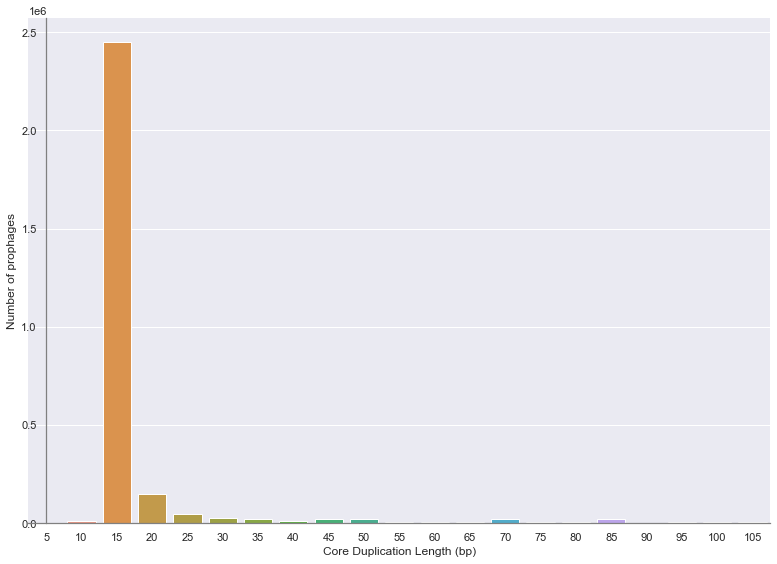

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11, 8))
ax = sns.countplot(x='length_bins_5', data=insl, ax=ax)


ax.set_ylabel('Number of prophages')
ax.set_xlabel('Core Duplication Length (bp)')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.tight_layout()

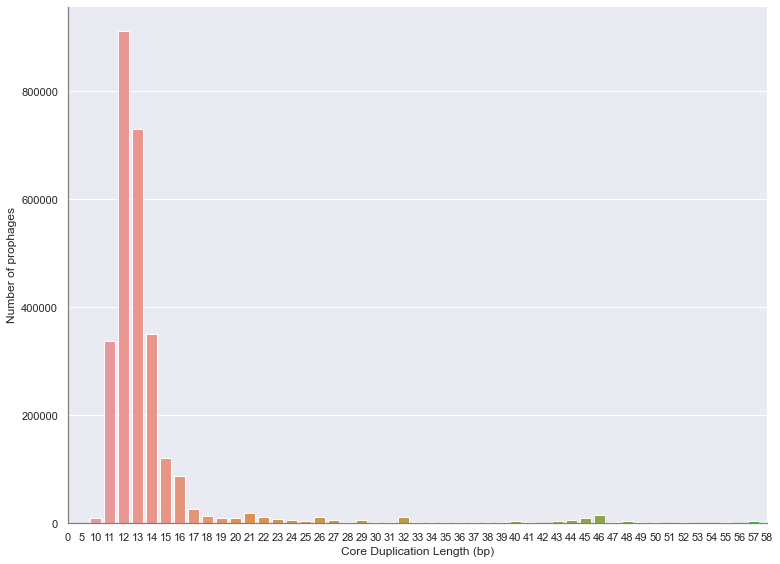

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11, 8))
ax = sns.countplot(x='insl_int', data=insl, ax=ax)
ax.set_xlim(0, 50)



ax.set_ylabel('Number of prophages')
ax.set_xlabel('Core Duplication Length (bp)')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.tight_layout()

fig.savefig('images/core_dups.png')
fig.savefig('images/core_dups.svg')